In [2]:
PROJECT_PATH = "/Users/lukefoster/Documents/CompEtho/BM_GPU"
CONFIG_PATH = f"{PROJECT_PATH}/config_ant.yaml"

In [10]:
import sys
from tqdm.notebook import tqdm
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
from os import listdir
from cluster import HDBSCAN
from sklearn.utils import shuffle
import math

sys.path.append(PROJECT_PATH)
from utils.data import Dataset
from utils.figure import plot_HDBSCAN

In [5]:
Data = Dataset(PROJECT_PATH, CONFIG_PATH)
Data.load_data()

  0%|          | 0/141 [00:00<?, ?it/s]

Loading config.yaml ...
Finished loading config
Loading INFO.yaml ...
Finished loading INFO


100%|██████████| 141/141 [00:10<00:00, 13.07it/s]


In [6]:
INFO = Data.info
INFO_values = Data.info_values
config = Data.config

In [7]:
FILE_PATH = f"{PROJECT_PATH}/results/final"

In [8]:
tot_files = [f for f in listdir(FILE_PATH)]
min_folders = []
mid_folders = []
maj_folders = []

for file in tot_files:
    if "min" in file:
        min_folders.append(file)
    elif "mid" in file:
        mid_folders.append(file)
    elif "maj" in file:
        maj_folders.append(file)

In [39]:
# load postural embeddings
min_postural_embeddings = []
mid_postural_embeddings = []
maj_postural_embeddings = []

for folder in min_folders:
    min_postural_embeddings.append(np.load(f"{FILE_PATH}/{folder}/all_postural_embeddings.npy"))
for folder in mid_folders:
    mid_postural_embeddings.append(np.load(f"{FILE_PATH}/{folder}/all_postural_embeddings.npy"))
for folder in maj_folders:
    maj_postural_embeddings.append(np.load(f"{FILE_PATH}/{folder}/all_postural_embeddings.npy"))

min_postural_embeddings = np.concatenate(min_postural_embeddings)
mid_postural_embeddings = np.concatenate(mid_postural_embeddings)
maj_postural_embeddings = np.concatenate(maj_postural_embeddings)
all_postural_embeddings = Data.data_obj['all_postural_embeddings']

# load kinematic embeddings
min_kinematic_embeddings = []
mid_kinematic_embeddings = []
maj_kinematic_embeddings = []

for folder in min_folders:
    min_kinematic_embeddings.append(np.load(f"{FILE_PATH}/{folder}/all_kinematic_embeddings.npy"))
for folder in mid_folders:
    mid_kinematic_embeddings.append(np.load(f"{FILE_PATH}/{folder}/all_kinematic_embeddings.npy"))
for folder in maj_folders:
    maj_kinematic_embeddings.append(np.load(f"{FILE_PATH}/{folder}/all_kinematic_embeddings.npy"))

min_kinematic_embeddings = np.concatenate(min_kinematic_embeddings)
mid_kinematic_embeddings = np.concatenate(mid_kinematic_embeddings)
maj_kinematic_embeddings = np.concatenate(maj_kinematic_embeddings)
all_kinematic_embeddings = Data.data_obj['all_kinematic_embeddings']

# load combined embeddings
min_embeddings = []
mid_embeddings = []
maj_embeddings = []

for folder in min_folders:
    min_embeddings.append(np.load(f"{FILE_PATH}/{folder}/all_embeddings.npy"))
for folder in mid_folders:
    mid_embeddings.append(np.load(f"{FILE_PATH}/{folder}/all_embeddings.npy"))
for folder in maj_folders:
    maj_embeddings.append(np.load(f"{FILE_PATH}/{folder}/all_embeddings.npy"))

min_embeddings = np.concatenate(min_embeddings)
mid_embeddings = np.concatenate(mid_embeddings)
maj_embeddings = np.concatenate(maj_embeddings)
all_embeddings = Data.data_obj['all_embeddings']

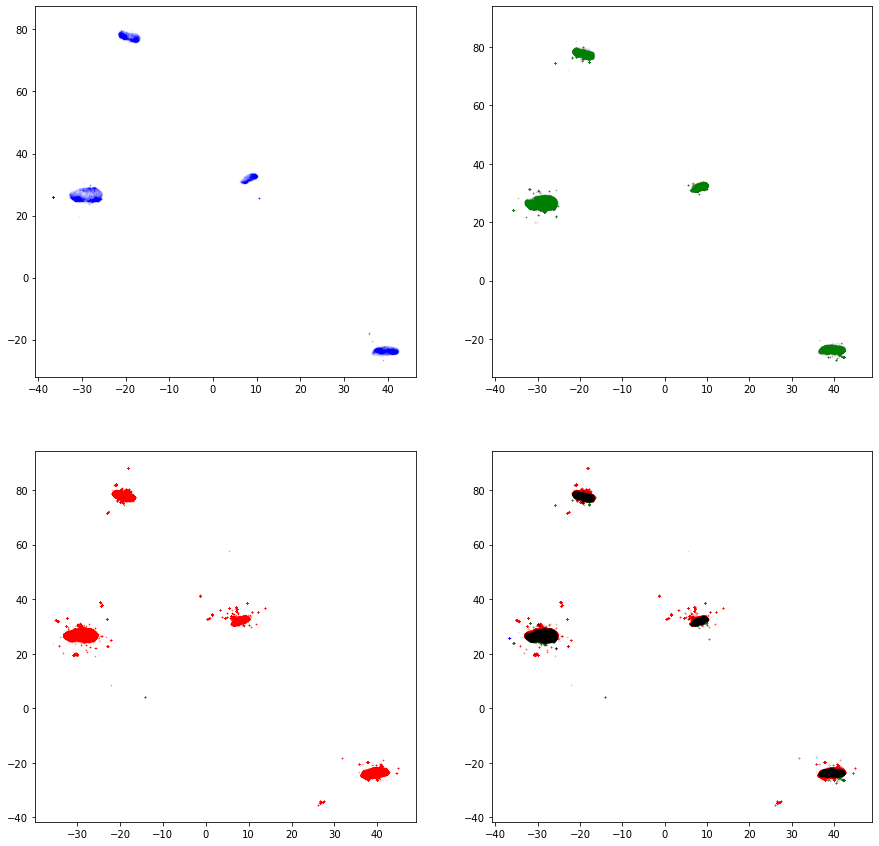

In [49]:
# postural embeddings

fig,ax = plt.subplots(2,2, figsize=(15,15))

ax[0,0].scatter(min_postural_embeddings[:,0], min_postural_embeddings[:,1], s=1, alpha=0.01, c='blue')
ax[0,1].scatter(mid_postural_embeddings[:,0], mid_postural_embeddings[:,1], s=1, alpha=0.01, c='green')
ax[1,0].scatter(maj_postural_embeddings[:,0], maj_postural_embeddings[:,1], s=1, alpha=0.01, c='red')

ax[1,1].scatter(min_postural_embeddings[:,0], min_postural_embeddings[:,1], s=2, alpha=0.005, c='blue')
ax[1,1].scatter(mid_postural_embeddings[:,0], mid_postural_embeddings[:,1], s=2, alpha=0.005, c='green')
ax[1,1].scatter(maj_postural_embeddings[:,0], maj_postural_embeddings[:,1], s=2, alpha=0.005, c='red')

plt.show()

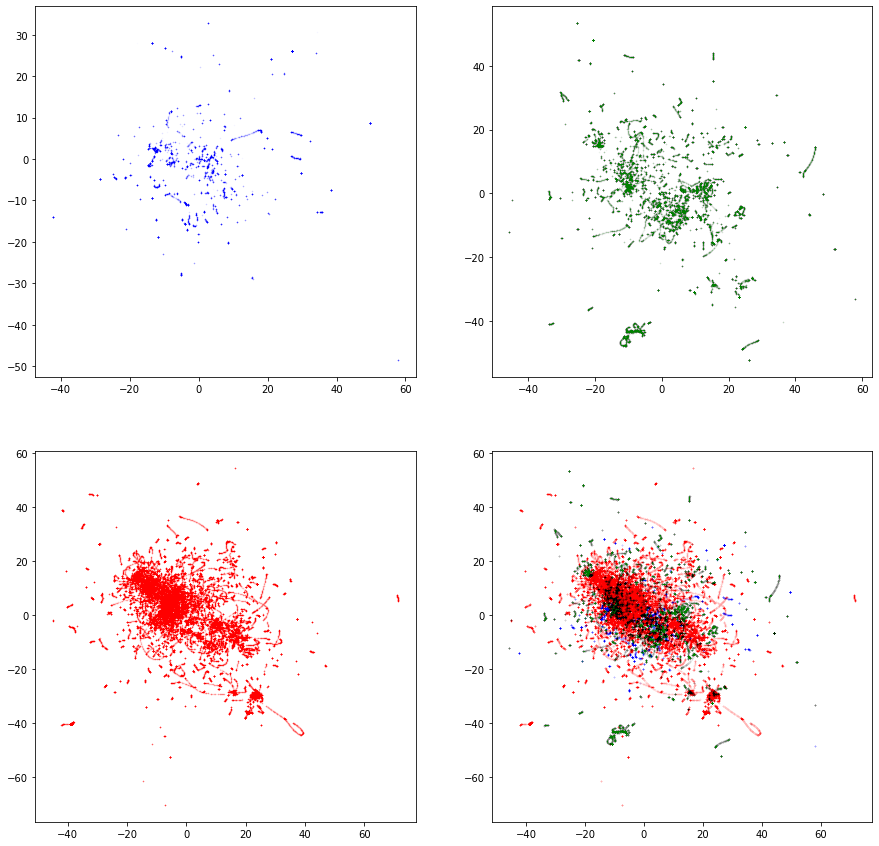

In [123]:
# kinematic embeddings

fig,ax = plt.subplots(2,2, figsize=(15,15))

ax[0,0].scatter(min_kinematic_embeddings[:,0], min_kinematic_embeddings[:,1], s=1, alpha=0.01, c='blue')
ax[0,1].scatter(mid_kinematic_embeddings[:,0], mid_kinematic_embeddings[:,1], s=1, alpha=0.01, c='green')
ax[1,0].scatter(maj_kinematic_embeddings[:,0], maj_kinematic_embeddings[:,1], s=1, alpha=0.01, c='red')

ax[1,1].scatter(min_kinematic_embeddings[:,0], min_kinematic_embeddings[:,1], s=2, alpha=0.005, c='blue')
ax[1,1].scatter(mid_kinematic_embeddings[:,0], mid_kinematic_embeddings[:,1], s=2, alpha=0.005, c='green')
ax[1,1].scatter(maj_kinematic_embeddings[:,0], maj_kinematic_embeddings[:,1], s=2, alpha=0.005, c='red')

plt.show()

In [35]:
min_labels, min_num_clusters, min_clusterer = HDBSCAN(min_kinematic_embeddings, min_cluster_size=820,
                                          min_samples=20, cluster_selection_epsilon=0,
                                          cluster_selection_method='leaf', memory='memory')
min_color_palette = sns.color_palette('rainbow', int(min_num_clusters))
min_color_palette = shuffle(min_color_palette, random_state=1)

mid_labels, mid_num_clusters, mid_clusterer = HDBSCAN(mid_kinematic_embeddings, min_cluster_size=3200,
                                          min_samples=20, cluster_selection_epsilon=0,
                                          cluster_selection_method='leaf', memory='memory')
mid_color_palette = sns.color_palette('rainbow', int(mid_num_clusters))
mid_color_palette = shuffle(mid_color_palette, random_state=1)

maj_labels, maj_num_clusters, maj_clusterer = HDBSCAN(maj_kinematic_embeddings, min_cluster_size=4370,
                                          min_samples=20, cluster_selection_epsilon=0,
                                          cluster_selection_method='leaf', memory='memory')
maj_color_palette = sns.color_palette('rainbow', int(maj_num_clusters))
maj_color_palette = shuffle(maj_color_palette, random_state=1)

labels, num_clusters, clusterer = HDBSCAN(all_kinematic_embeddings, min_cluster_size=7500,
                                          min_samples=20, cluster_selection_epsilon=0,
                                          cluster_selection_method='leaf', memory='memory')
color_palette = sns.color_palette('rainbow', int(num_clusters))
color_palette = shuffle(color_palette, random_state=1)

Frac Outlier: 0.021518617052817168
# Clusters: 12
Frac Outlier: 0.08096529827703827
# Clusters: 12
Frac Outlier: 0.3254013488405142
# Clusters: 12
Frac Outlier: 0.21403710623896316
# Clusters: 12


100%|██████████| 12/12 [00:00<00:00, 8589.02it/s]


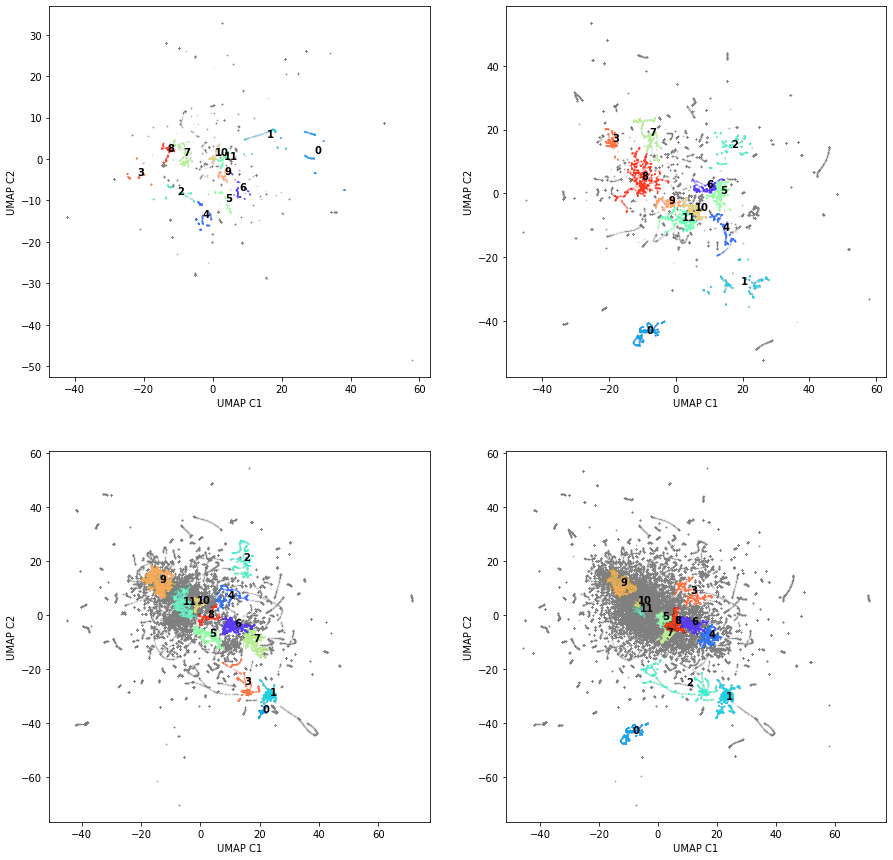

In [36]:
fig,ax = plt.subplots(2,2, figsize=(15,15))
plot_HDBSCAN(ax[0,0], min_kinematic_embeddings, min_labels, min_color_palette, alpha=0.01,
             toggle_numbering=True)
plot_HDBSCAN(ax[0,1], mid_kinematic_embeddings, mid_labels, mid_color_palette, alpha=0.01,
             toggle_numbering=True)
plot_HDBSCAN(ax[1,0], maj_kinematic_embeddings, maj_labels, maj_color_palette, alpha=0.01,
             toggle_numbering=True)
plot_HDBSCAN(ax[1,1], all_kinematic_embeddings, labels, color_palette, alpha=0.01,
             toggle_numbering=True)

plt.show()

In [58]:
# make kinematic sample size smaller

min_kinematic_embed = []
for point in min_kinematic_embeddings:
    point = point.tolist()
    min_kinematic_embed.append(point)
min_kinematic_embed = np.array(min_kinematic_embed)

mid_kinematic_embed = []
for point in mid_kinematic_embeddings:
    point = point.tolist()
    mid_kinematic_embed.append(point)
mid_kinematic_embed = np.array(mid_kinematic_embed)

maj_kinematic_embed = []
for point in maj_kinematic_embeddings:
    point = point.tolist()
    maj_kinematic_embed.append(point)
maj_kinematic_embed = np.array(maj_kinematic_embed)

all_kinematic_embed = []
for point in all_kinematic_embeddings:
    point = point.tolist()
    all_kinematic_embed.append(point)
all_kinematic_embed = np.array(all_kinematic_embed)

idx_min = random.choices(np.arange(len(min_kinematic_embed)), k=40000)
idx_mid = random.choices(np.arange(len(mid_kinematic_embed)), k=30000)
idx_maj = random.choices(np.arange(len(maj_kinematic_embed)), k=10000)
idx_all = random.choices(np.arange(len(all_kinematic_embed)), k=10000)

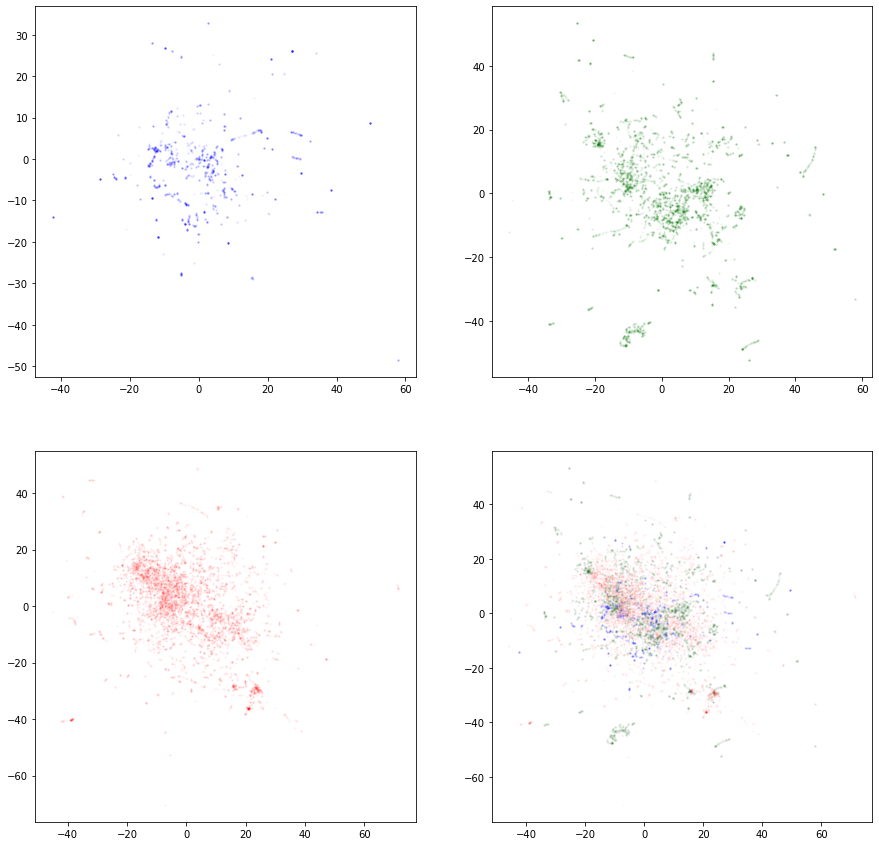

In [59]:
# kinematic embeddings

fig,ax = plt.subplots(2,2, figsize=(15,15))

ax[0,0].scatter(min_kinematic_embeddings[idx_min,0], min_kinematic_embeddings[idx_min,1], s=2, alpha=0.04, c='blue')
ax[0,1].scatter(mid_kinematic_embeddings[idx_mid,0], mid_kinematic_embeddings[idx_mid,1], s=2, alpha=0.04, c='green')
ax[1,0].scatter(maj_kinematic_embeddings[idx_maj,0], maj_kinematic_embeddings[idx_maj,1], s=2, alpha=0.04, c='red')

ax[1,1].scatter(min_kinematic_embeddings[idx_min,0], min_kinematic_embeddings[idx_min,1], s=2, alpha=0.02, c='blue')
ax[1,1].scatter(mid_kinematic_embeddings[idx_mid,0], mid_kinematic_embeddings[idx_mid,1], s=2, alpha=0.02, c='green')
ax[1,1].scatter(maj_kinematic_embeddings[idx_maj,0], maj_kinematic_embeddings[idx_maj,1], s=2, alpha=0.02, c='red')

plt.show()

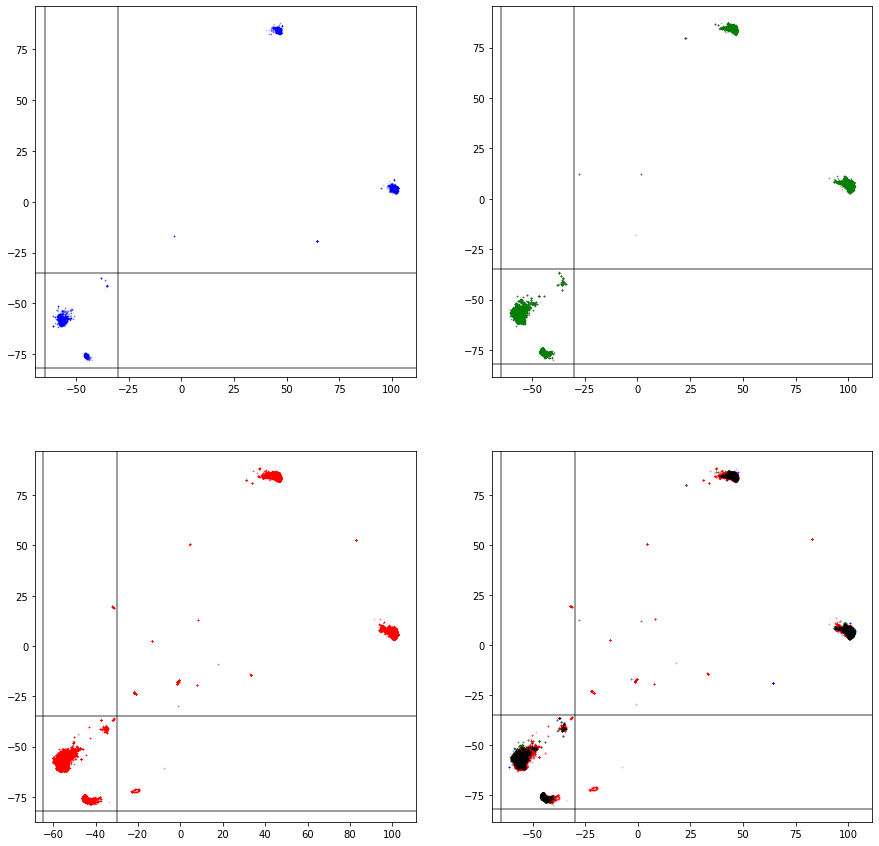

In [102]:
# combined embeddings

fig,ax = plt.subplots(2,2, figsize=(15,15))

ax[0,0].scatter(min_embeddings[:,0], min_embeddings[:,1], s=1, alpha=0.01, c='blue')
ax[0,1].scatter(mid_embeddings[:,0], mid_embeddings[:,1], s=1, alpha=0.01, c='green')
ax[1,0].scatter(maj_embeddings[:,0], maj_embeddings[:,1], s=1, alpha=0.01, c='red')

ax[1,1].scatter(min_embeddings[:,0], min_embeddings[:,1], s=2, alpha=0.005, c='blue')
ax[1,1].scatter(mid_embeddings[:,0], mid_embeddings[:,1], s=2, alpha=0.005, c='green')
ax[1,1].scatter(maj_embeddings[:,0], maj_embeddings[:,1], s=2, alpha=0.005, c='red')

for i in [0,1]:
    for j in [0,1]:
        ax[i,j].axhline(y=-35, color='black', alpha=0.5)
        ax[i,j].axhline(y=-82, color='black', alpha=0.5)
        ax[i,j].axvline(x=-65, color='black', alpha=0.5)
        ax[i,j].axvline(x=-30, color='black', alpha=0.5)

plt.show()

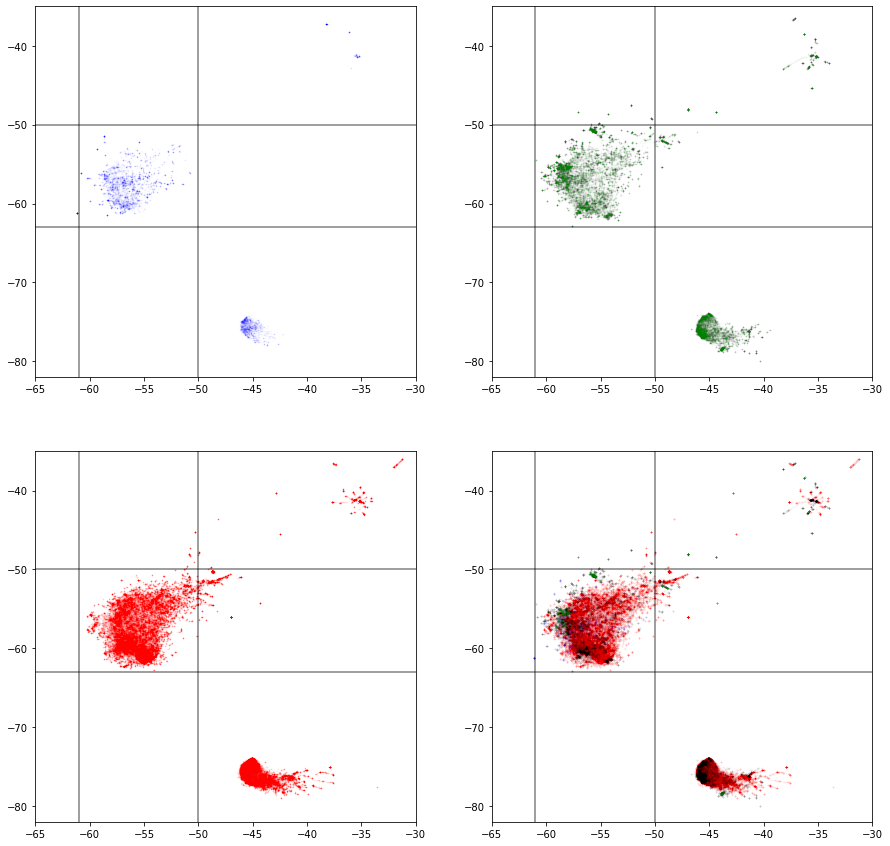

In [108]:
# combined embeddings

fig,ax = plt.subplots(2,2, figsize=(15,15))

ax[0,0].scatter(min_embeddings[:,0], min_embeddings[:,1], s=1, alpha=0.01, c='blue')
ax[0,1].scatter(mid_embeddings[:,0], mid_embeddings[:,1], s=1, alpha=0.01, c='green')
ax[1,0].scatter(maj_embeddings[:,0], maj_embeddings[:,1], s=1, alpha=0.01, c='red')

ax[1,1].scatter(min_embeddings[:,0], min_embeddings[:,1], s=2, alpha=0.005, c='blue')
ax[1,1].scatter(mid_embeddings[:,0], mid_embeddings[:,1], s=2, alpha=0.005, c='green')
ax[1,1].scatter(maj_embeddings[:,0], maj_embeddings[:,1], s=2, alpha=0.005, c='red')

for i in [0,1]:
    for j in [0,1]:
        ax[i,j].set(xlim=(-65,-30), ylim=(-82,-35))
        
        ax[i,j].axhline(y=-63, color='black', alpha=0.5)
        ax[i,j].axhline(y=-50, color='black', alpha=0.5)
        ax[i,j].axvline(x=-61, color='black', alpha=0.5)
        ax[i,j].axvline(x=-50, color='black', alpha=0.5)

plt.show()

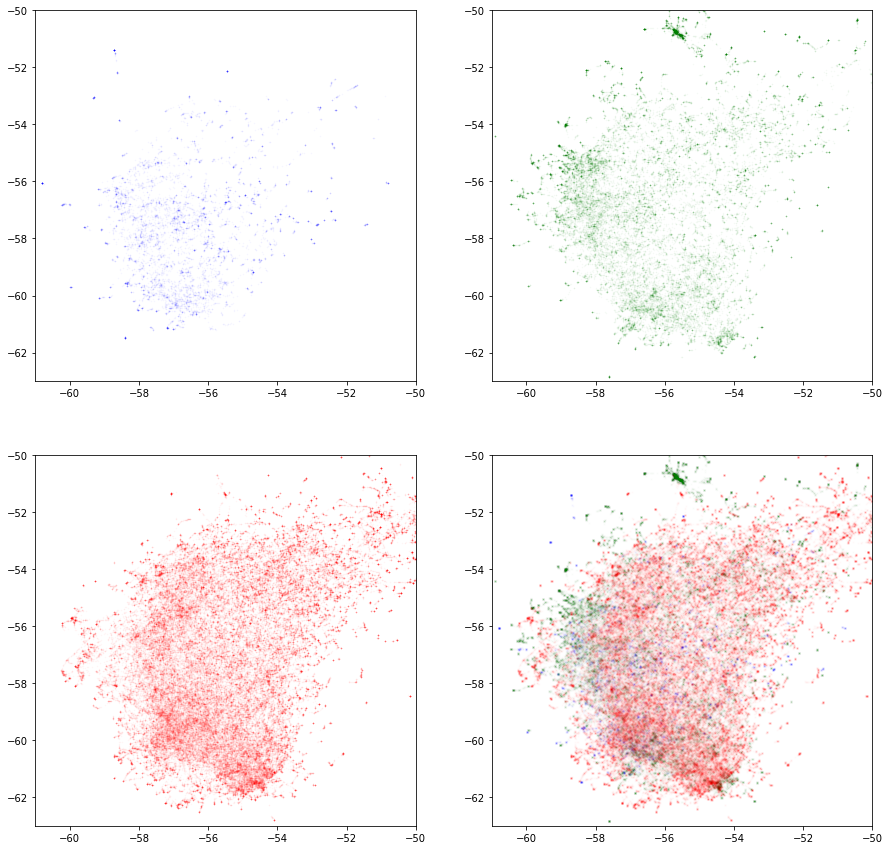

In [85]:
# combined embeddings

fig,ax = plt.subplots(2,2, figsize=(15,15))

freq_cluster_colors = np.array([freq_color_palette[f] for f in [0,1]])

ax[0,0].scatter(min_embeddings[:,0], min_embeddings[:,1], s=1, alpha=0.02, c='blue')
ax[0,1].scatter(mid_embeddings[:,0], mid_embeddings[:,1], s=1, alpha=0.02, c='green')
ax[1,0].scatter(maj_embeddings[:,0], maj_embeddings[:,1], s=1, alpha=0.02, c='red')

ax[1,1].scatter(min_embeddings[:,0], min_embeddings[:,1], s=2, alpha=0.01, c='blue')
ax[1,1].scatter(mid_embeddings[:,0], mid_embeddings[:,1], s=2, alpha=0.01, c='green')
ax[1,1].scatter(maj_embeddings[:,0], maj_embeddings[:,1], s=2, alpha=0.01, c='red')

for i in [0,1]:
    for j in [0,1]:
        ax[i,j].set(xlim=(-61,-50), ylim=(-63,-50))

plt.show()

In [216]:
zoom_min = []
for point in min_embeddings:
    if math.isnan(point[0]) == False:
        if point[0]>-61 and point[0]<-50 and point[1]>-63 and point[1]<-50:
            point = point.tolist()
            zoom_min.append(point)
zoom_min = np.array(zoom_min)
            
zoom_mid = []
for point in mid_embeddings:
    if math.isnan(point[0]) == False:
        if point[0]>-61 and point[0]<-50 and point[1]>-63 and point[1]<-50:
            point = point.tolist()
            zoom_mid.append(point)
zoom_mid = np.array(zoom_mid)
            
zoom_maj = []
for point in maj_embeddings:
    if math.isnan(point[0]) == False:
        if point[0]>-61 and point[0]<-50 and point[1]>-63 and point[1]<-50:
            point = point.tolist()
            zoom_maj.append(point)
zoom_maj = np.array(zoom_maj)

zoom_all = []
for point in all_embeddings:
    if math.isnan(point[0]) == False:
        if point[0]>-61 and point[0]<-50 and point[1]>-63 and point[1]<-50:
            point = point.tolist()
            zoom_all.append(point)
zoom_all = np.array(zoom_all)

In [241]:
zoom_min_labels, zoom_min_num_clusters, zoom_min_clusterer = HDBSCAN(zoom_min, min_cluster_size=275,
                                          min_samples=20, cluster_selection_epsilon=0,
                                          cluster_selection_method='leaf', memory='memory')
zoom_min_color_palette = sns.color_palette('rainbow', int(zoom_min_num_clusters))
zoom_min_color_palette = shuffle(zoom_min_color_palette, random_state=1)

zoom_mid_labels, zoom_mid_num_clusters, zoom_mid_clusterer = HDBSCAN(zoom_mid, min_cluster_size=1070,
                                          min_samples=20, cluster_selection_epsilon=0,
                                          cluster_selection_method='leaf', memory='memory')
zoom_mid_color_palette = sns.color_palette('rainbow', int(zoom_mid_num_clusters))
zoom_mid_color_palette = shuffle(zoom_mid_color_palette, random_state=1)

zoom_maj_labels, zoom_maj_num_clusters, zoom_maj_clusterer = HDBSCAN(zoom_maj, min_cluster_size=3500,
                                          min_samples=20, cluster_selection_epsilon=0,
                                          cluster_selection_method='leaf', memory='memory')
zoom_maj_color_palette = sns.color_palette('rainbow', int(zoom_maj_num_clusters))
zoom_maj_color_palette = shuffle(zoom_maj_color_palette, random_state=1)

zoom_all_labels, zoom_all_num_clusters, zoom_all_clusterer = HDBSCAN(zoom_all, min_cluster_size=2900,
                                          min_samples=20, cluster_selection_epsilon=0,
                                          cluster_selection_method='leaf', memory='memory')
zoom_all_color_palette = sns.color_palette('rainbow', int(zoom_all_num_clusters))
zoom_all_color_palette = shuffle(zoom_all_color_palette, random_state=1)

Frac Outlier: 0.5135912698412698
# Clusters: 6
Frac Outlier: 0.591016147170532
# Clusters: 6
Frac Outlier: 0.6434577381940485
# Clusters: 6
Frac Outlier: 0.7456243102480203
# Clusters: 6


100%|██████████| 6/6 [00:00<00:00, 9784.53it/s]


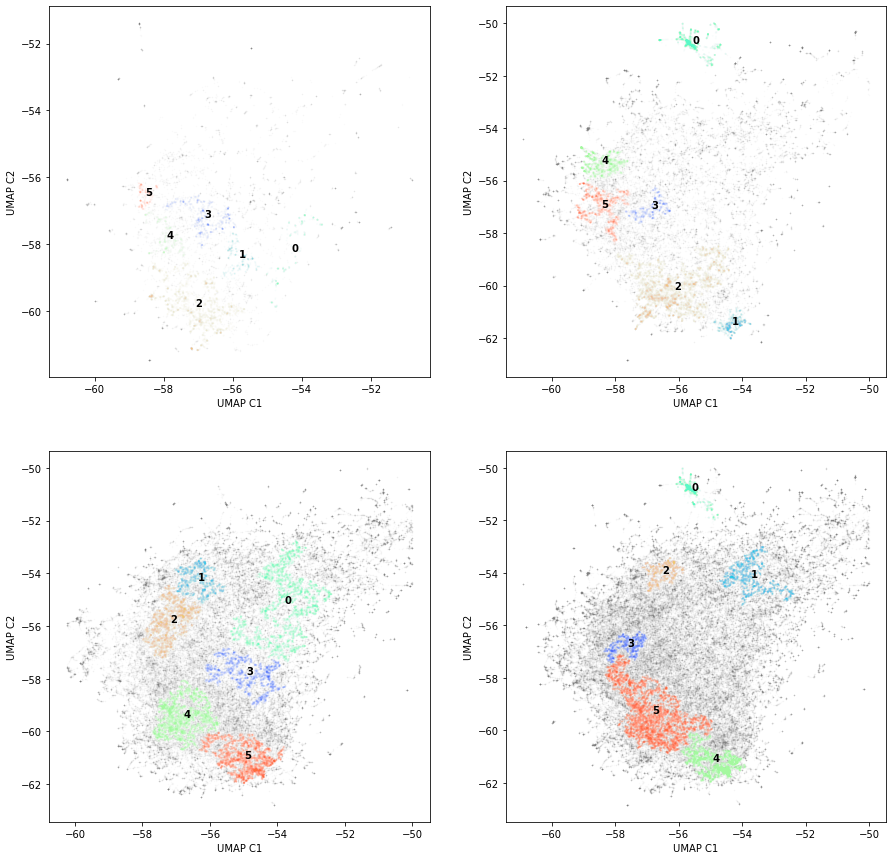

In [242]:
fig,ax = plt.subplots(2,2, figsize=(15,15))
plot_HDBSCAN(ax[0,0], zoom_min, zoom_min_labels, zoom_min_color_palette, alpha=0.02,
             toggle_numbering=True)
plot_HDBSCAN(ax[0,1], zoom_mid, zoom_mid_labels, zoom_mid_color_palette, alpha=0.02,
             toggle_numbering=True)
plot_HDBSCAN(ax[1,0], zoom_maj, zoom_maj_labels, zoom_maj_color_palette, alpha=0.02,
             toggle_numbering=True)
plot_HDBSCAN(ax[1,1], zoom_all, zoom_all_labels, zoom_all_color_palette, alpha=0.02,
             toggle_numbering=True)

plt.show()

In [19]:
tot_min = []
for point in min_embeddings:
    if math.isnan(point[0]) == False:
        point = point.tolist()
        tot_min.append(point)
tot_min = np.array(tot_min)

print(f"TOTAL MIN EMBEDDINGS: {len(min_embeddings)}")
print(f"NON-NaN MIN EMBEDDINGS: {len(tot_min)}")
print("")


tot_mid = []
for point in mid_embeddings:
    if math.isnan(point[0]) == False:
        point = point.tolist()
        tot_mid.append(point)
tot_mid = np.array(tot_mid)

print(f"TOTAL MIN EMBEDDINGS: {len(mid_embeddings)}")
print(f"NON-NaN MIN EMBEDDINGS: {len(tot_mid)}")
print("")


tot_maj = []
for point in maj_embeddings:
    if math.isnan(point[0]) == False:
        point = point.tolist()
        tot_maj.append(point)
tot_maj = np.array(tot_maj)

print(f"TOTAL MIN EMBEDDINGS: {len(maj_embeddings)}")
print(f"NON-NaN MIN EMBEDDINGS: {len(tot_maj)}")

TOTAL MIN EMBEDDINGS: 505934
NON-NaN MIN EMBEDDINGS: 29462

TOTAL MIN EMBEDDINGS: 618586
NON-NaN MIN EMBEDDINGS: 134987

TOTAL MIN EMBEDDINGS: 661457
NON-NaN MIN EMBEDDINGS: 372704
